In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import requests
import json
from datetime import datetime

**Import df_cleaned.csv**

In [2]:
df_cleaned = pd.read_csv('df_cleaned.csv')

In [3]:
df_cleaned.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact
0,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF
1,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE
2,2010,1,2,SKW,SKYWEST AIRLINES,CRJ100/200,KSLC,SALT LAKE CITY INTL,UT,LANDING ROLL,DAY,0.0,80.0,0.0,YH004,HORNED LARK,1,NONE
3,2010,1,2,NWA,NORTHWEST AIRLINES,DC-9,KBWI,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,MD,TAKEOFF RUN,DAY,0.0,140.0,0.0,K33,HAWK,1,NONE
4,2010,1,2,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,APPROACH,DAY,20.0,120.0,0.0,YI010,TREE SWALLOW,1,NONE


**Create birdstrike count for airports and save as csv**

In [5]:
airport_counts = df_cleaned.groupby('Airport ID').size().sort_values(ascending=False)
df_airports = pd.DataFrame({'Airport ID':airport_counts.index, 'Birdstrikes_N':airport_counts.values})

In [6]:
df_airports.head()

,Airport ID,Birdstrikes_N
0,KSDF,444
1,KDFW,434
2,KPHL,375
3,KSMF,347
4,KDEN,322


**Import airport_codes_csv (downloaded from internet)**

In [7]:
airport_codes = pd.read_csv('airport-codes_csv.csv')

In [8]:
airport_codes.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [ ]:
# airport_codes[airport_codes['ident'] == 'KJAX']
# name municipality gps_code coordinates

In [ ]:
#df_merged = pd.merge(airports, airport_codes, how = 'left', left_on = 'Airport ID', right_on = 'ident')

In [ ]:
#df_merged['long'], df_merged['lat'] = df_merged['coordinates'].str.split(',', 1).str

In [ ]:
#pd.set_option('display.max_rows', None)

In [ ]:
len(airport_codes)

**Merging df_airports and airport_codes to get long/lat values for airport IDs that only our data has**

In [10]:
# Using inner join as some of the airport codes in our tables dont exist in airport codes table downlaoded from internet.
airports_w_coords = pd.merge(df_airports, airport_codes, how = 'inner', left_on = 'Airport ID', right_on = 'ident')

In [11]:
airports_w_coords['long'], airports_w_coords['lat'] = airports_w_coords['coordinates'].str.split(',', 1).str

<ipython-input-11-7196ca67af32>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  airports_w_coords['long'], airports_w_coords['lat'] = airports_w_coords['coordinates'].str.split(',', 1).str


In [12]:
airports_w_coords['lat'] = airports_w_coords['lat'].astype(str)
airports_w_coords['long'] = airports_w_coords['long'].astype(str)

In [13]:
airports_w_coords.head()

,Airport ID,Birdstrikes_N,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,long,lat
0,KSDF,444,KSDF,large_airport,Louisville Muhammad Ali International Airport,501.0,NaN,US,US-KY,Louisville,KSDF,SDF,SDF,"-85.736, 38.1744",-85.736,38.1744
1,KDFW,434,KDFW,large_airport,Dallas Fort Worth International Airport,607.0,NaN,US,US-TX,Dallas-Fort Worth,KDFW,DFW,DFW,"-97.038002, 32.896801",-97.038002,32.896801
2,KPHL,375,KPHL,large_airport,Philadelphia International Airport,36.0,NaN,US,US-PA,Philadelphia,KPHL,PHL,PHL,"-75.24109649658203, 39.87189865112305",-75.24109649658203,39.87189865112305
3,KSMF,347,KSMF,large_airport,Sacramento International Airport,27.0,NaN,US,US-CA,Sacramento,KSMF,SMF,SMF,"-121.59100341796875, 38.69540023803711",-121.59100341796875,38.69540023803711
4,KDEN,322,KDEN,large_airport,Denver International Airport,5431.0,NaN,US,US-CO,Denver,KDEN,DEN,DEN,"-104.672996521, 39.861698150635",-104.672996521,39.861698150635


In [31]:
airports_w_coords = airports_w_coords.drop(columns=['type', 'ident', 'continent', 'iso_country', 'iso_region', 'gps_code', 'iata_code', 'local_code'])

**Create empty zips with lat/long df**

In [21]:
column_names = ["lat_", "long_", "zipcode"]
df_w_zip = pd.DataFrame(columns = column_names)

**Import zipcodes via API**

In [15]:
Token = '546a860b4a7a4d0697f2fe7f66f1e7e5'

In [16]:
# initially, list was used to store zip codes, then switched to df
# zip_codes_list = []

In [22]:
for index, row in airports_w_coords.iterrows():
    #make the api call
    response = requests.get('https://api.bigdatacloud.net/data/reverse-geocode?latitude='+row.lat+'&longitude='+row.long+'&localityLanguage=en&key='+Token)  
    #load the api response as a json
    res_json = json.loads(response.text)
    if res_json['postcode'] == None:
        continue
    else:
        new_row = {'lat_':row.lat, 'long_': row.long, 'zipcode': res_json['postcode']}
        # print(new_row)
        df_w_zip = df_w_zip.append(new_row, ignore_index=True)

In [24]:
len(df_w_zip)

865

In [25]:
df_w_zip.head()

,lat_,long_,zipcode
0,38.1744,-85.736,40213
1,32.896801,-97.038002,76051
2,39.87189865112305,-75.24109649658203,19113
3,38.69540023803711,-121.59100341796875,95837
4,39.861698150635,-104.672996521,80249


In [26]:
#df_w_zip.to_csv('df_w_zip.csv', index = False)
pd.read_csv('df_w_zip.csv')  # Save time instead of running API again

,lat_,long_,zipcode
0,32.896801,-97.038002,76051.0
1,38.695400,-121.591003,95837.0
2,39.861698,-104.672997,80249.0
3,39.871899,-75.241096,19113.0
4,36.124500,-86.678200,37214.0
...,...,...,...
1348,31.084900,-83.803299,31788.0
1349,39.140999,-96.670799,66503.0
1350,35.599899,-88.915604,38301.0
1351,34.882401,-95.783501,74501.0


**Join all dates together into one column**

In [27]:
# Remove from here later. Shifted to 1st script


df_cleaned["incident_date"] = df_cleaned["Incident Year"].astype(str) + "-" + df_cleaned["Incident Month"].astype(str) + "-" + df_cleaned["Incident Day"].astype(str)
df_cleaned["incident_date"] = pd.to_datetime(df_cleaned['incident_date'], format= '%Y-%m-%d').astype(str)
# date_list = pd.DataFrame(df_cleaned['incident_date'])
# date_list['incident_date'] = date_list['incident_date'].astype(str)

In [28]:
len(df_cleaned)

13722

In [ ]:
#len(df_cleaned[df_cleaned['incident_date'].str.contains("2010")])

In [34]:
df_cleaned_w_coords = pd.merge(df_cleaned, airports_w_coords, how = 'inner', left_on = 'Airport ID', right_on = 'Airport ID')

In [35]:
df_cleaned_w_coords.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,...,Species Quantity,Flight Impact,incident_date,Birdstrikes_N,name,elevation_ft,municipality,coordinates,long,lat
0,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,...,1,ABORTED TAKEOFF,2010-01-01,4,Pompano Beach Airpark,19.0,Pompano Beach,"-80.111099243164, 26.247100830078",-80.111099243164,26.247100830078
1,2013,8,27,BUS,BUSINESS,PA-31 NAVAJO,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,...,2-10,NONE,2013-08-27,4,Pompano Beach Airpark,19.0,Pompano Beach,"-80.111099243164, 26.247100830078",-80.111099243164,26.247100830078
2,2013,8,31,BUS,BUSINESS,LEARJET-55,KPMP,POMPANO BEACH AIRPARK,FL,LANDING ROLL,...,1,NONE,2013-08-31,4,Pompano Beach Airpark,19.0,Pompano Beach,"-80.111099243164, 26.247100830078",-80.111099243164,26.247100830078
3,2013,10,31,BUS,BUSINESS,PA-28,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,...,1,NONE,2013-10-31,4,Pompano Beach Airpark,19.0,Pompano Beach,"-80.111099243164, 26.247100830078",-80.111099243164,26.247100830078
4,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,...,1,NONE,2010-01-01,214,Orlando International Airport,96.0,Orlando,"-81.30899810791016, 28.429399490356445",-81.30899810791016,28.429399490356445


In [38]:
df_cleaned_w_zip_coords = pd.merge(df_cleaned_w_coords, df_w_zip, how = 'inner', left_on = ['long', 'lat'], right_on = ['long_', 'lat_'])

In [41]:
df_cleaned_w_zip_coords.drop(columns=['lat_','long_'], inplace=True)

In [43]:
df_cleaned_w_zip_coords = df_cleaned_w_zip_coords[df_cleaned_w_zip_coords["zipcode"] != ""]

In [44]:
len(df_cleaned_w_zip_coords)

13535

In [46]:
df_cleaned_2010 = df_cleaned_w_zip_coords[df_cleaned_w_zip_coords['incident_date'].str.contains("2010")]
#df_zip_date_2011 = df_zip_date[df_zip_date['incident_date'].str.contains("2011")]

In [47]:
df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype(str)
#df_zip_date_2011['zipcode'] = df_zip_date_2011['zipcode'].astype(str)

<ipython-input-47-eb0bf5d06c62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype(str)


In [54]:
df_cleaned_2010.sort_values(by=['incident_date'], inplace = True)

<ipython-input-54-7ff05a1b1bed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2010.sort_values(by=['incident_date'], inplace = True)


In [ ]:
# Abduvosids
Token_w = 'EHZroSHTsmfKuOMeOWRkrDpMPWoZTXmb' 

#Fasihs
Token_f = 'KHliZgSorqkyvUBivnqDQPLShGaEkNui'

From the documentation:

ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt

https://stackoverflow.com/questions/49280302/noaa-api-returning-impossible-historical-temperature-values

TOBS = Temperature at the time of observation (tenths of degrees C). We can divide results by 10

Documentation for GCHND dataset: Other measurements we can look at
https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/doc/GHCND_documentation.pdf


Temperature data not imported due to constant errors by tht etime list gets to July.

In [103]:
df_cleaned_2010.to_csv("df_cleaned_2010.csv")

**Function to import weather data**

In [70]:
def get_weather(datatypeid):
    token = {'token': 'pgiGvZTCXlwUolZMKeeMTjEnzJTFCPLW'}
    column_names = ["date", "station", "zipcode", "value"]
    df = pd.DataFrame(columns = column_names)
    
    for index,row in df_cleaned_2010.iterrows():
        response = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=ZIP:'+row.zipcode+'&datatypeid='+datatypeid+'&startdate='+row.incident_date+'&enddate='+row.incident_date, 
                             headers=token)
        res_json = json.loads(response.text)
        if res_json != {}:
            new_row = {'date': row.incident_date, 'station': res_json['results'][0]['station'], 'zipcode': row.zipcode, 'value': res_json['results'][0]['value']}
            df = df.append(new_row, ignore_index=True)
            print(new_row)
    return(df)

In [61]:
df_cleaned_2010[df_cleaned_2010['incident_date'] >='2010-08-02'].head(40)

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,...,Flight Impact,incident_date,Birdstrikes_N,name,elevation_ft,municipality,coordinates,long,lat,zipcode
10642,2010,8,2,PVT,PRIVATELY OWNED,C-172,KEWB,NEW BEDFORD REGIONAL ARPT,MA,LANDING ROLL,...,NONE,2010-08-02,5,New Bedford Regional Airport,80.0,New Bedford,"-70.95690155029297, 41.67610168457031",-70.95690155029297,41.67610168457031,02745
11713,2010,8,2,BUS,BUSINESS,BE-300 KING,KLNL,KINGS LAND O' LAKES ARPT,WI,APPROACH,...,NONE,2010-08-02,1,Kings Land O' Lakes Airport,1704.0,Land O' Lakes,"-89.21209717, 46.15399933",-89.21209717,46.15399933,54540
10696,2010,8,2,BTA,EXPRESSJET (CONTINENTAL EXPRS),EMB-145,KMSN,DANE COUNTY REGIONAL ARPT-TRUAX FLD,WI,APPROACH,...,NONE,2010-08-02,21,Dane County Regional Truax Field,887.0,Madison,"-89.3375015258789, 43.13990020751953",-89.3375015258789,43.13990020751953,53704
8777,2010,8,2,SWA,SOUTHWEST AIRLINES,B-737-300,KONT,ONTARIO INTL ARPT,CA,APPROACH,...,NONE,2010-08-02,77,Ontario International Airport,944.0,Ontario,"-117.60099792480469, 34.055999755859375",-117.60099792480469,34.055999755859375,91761
2128,2010,8,2,SWA,SOUTHWEST AIRLINES,B-737-300,KAUS,AUSTIN-BERGSTROM INTL,TX,APPROACH,...,NONE,2010-08-02,213,Austin Bergstrom International Airport,542.0,Austin,"-97.6698989868164, 30.194499969482422",-97.6698989868164,30.194499969482422,78719
9996,2010,8,2,1ASQ,ATLANTIC SOUTHEAST,CRJ700,KOMA,EPPLEY AIRFIELD,NE,LANDING ROLL,...,NONE,2010-08-02,171,Eppley Airfield,984.0,Omaha,"-95.894096, 41.3032",-95.894096,41.3032,68110
8321,2010,8,2,PDT,PIEDMONT AIRLINES,DHC8 DASH 8,KPHL,PHILADELPHIA INTL,PA,APPROACH,...,NONE,2010-08-02,375,Philadelphia International Airport,36.0,Philadelphia,"-75.24109649658203, 39.87189865112305",-75.24109649658203,39.87189865112305,19113
7543,2010,8,2,AAL,AMERICAN AIRLINES,MD-82,KORD,CHICAGO O'HARE INTL ARPT,IL,CLIMB,...,NONE,2010-08-02,167,Chicago O'Hare International Airport,672.0,Chicago,"-87.9048, 41.9786",-87.9048,41.9786,60018
703,2010,8,2,SKW,SKYWEST AIRLINES,CRJ700,KSMF,SACRAMENTO INTL,CA,APPROACH,...,NONE,2010-08-02,347,Sacramento International Airport,27.0,Sacramento,"-121.59100341796875, 38.69540023803711",-121.59100341796875,38.69540023803711,95837
4676,2010,8,2,JBU,JETBLUE AIRWAYS,EMB-190,KCLT,CHARLOTTE/DOUGLAS INTL ARPT,NC,APPROACH,...,NONE,2010-08-02,133,Charlotte Douglas International Airport,748.0,Charlotte,"-80.94309997558594, 35.2140007019043",-80.94309997558594,35.2140007019043,28208


**Import Precipitation data**

Takes approx 30 mins to get data. Faster to read via csv.

In [72]:
df_w_prcp = get_weather("PRCP")

{'date': '2010-01-01', 'station': 'GHCND:USW00092805', 'zipcode': '33060', 'value': 23}
{'date': '2010-01-01', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 150}
{'date': '2010-01-02', 'station': 'GHCND:USW00024229', 'zipcode': '97218', 'value': 0}
{'date': '2010-01-02', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-01-02', 'station': 'GHCND:USW00024127', 'zipcode': '84116', 'value': 10}
{'date': '2010-01-02', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 0}
{'date': '2010-01-03', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 3}
{'date': '2010-01-03', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 3}
{'date': '2010-01-03', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 0}
{'date': '2010-01-03', 'station': 'GHCND:USW00093228', 'zipcode': '94541', 'value': 0}
{'date': '2010-01-04', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-01-05', 'station': 'GHCN

{'date': '2010-02-09', 'station': 'GHCND:USW00013781', 'zipcode': '19720', 'value': 147}
{'date': '2010-02-09', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 0}
{'date': '2010-02-10', 'station': 'GHCND:USW00012960', 'zipcode': '77032', 'value': 3}
{'date': '2010-02-10', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 0}
{'date': '2010-02-12', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 0}
{'date': '2010-02-12', 'station': 'GHCND:USW00012873', 'zipcode': '33762', 'value': 188}
{'date': '2010-02-12', 'station': 'GHCND:USW00014734', 'zipcode': '07114', 'value': 0}
{'date': '2010-02-13', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 3}
{'date': '2010-02-13', 'station': 'GHCND:US1CASC0037', 'zipcode': '95110', 'value': 0}
{'date': '2010-02-14', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 0}
{'date': '2010-02-15', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 0}
{'date': '2010-02-15', 'station': 'GHCN

{'date': '2010-03-25', 'station': 'GHCND:USW00014739', 'zipcode': '02128', 'value': 0}
{'date': '2010-03-25', 'station': 'GHCND:USC00083163', 'zipcode': '33315', 'value': 0}
{'date': '2010-03-25', 'station': 'GHCND:US1TXBXR112', 'zipcode': '78216', 'value': 119}
{'date': '2010-03-26', 'station': 'GHCND:USC00363343', 'zipcode': '15108', 'value': 124}
{'date': '2010-03-26', 'station': 'GHCND:USW00094846', 'zipcode': '60018', 'value': 0}
{'date': '2010-03-26', 'station': 'GHCND:USW00014821', 'zipcode': '43219', 'value': 13}
{'date': '2010-03-27', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-03-27', 'station': 'GHCND:USC00502107', 'zipcode': '99709', 'value': 0}
{'date': '2010-03-28', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 300}
{'date': '2010-03-28', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 0}
{'date': '2010-03-28', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 300}
{'date': '2010-03-28', 'station': 

{'date': '2010-04-21', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 0}
{'date': '2010-04-21', 'station': 'GHCND:USC00516395', 'zipcode': '96818', 'value': 8}
{'date': '2010-04-21', 'station': 'GHCND:US1TXTN0023', 'zipcode': '76051', 'value': 0}
{'date': '2010-04-21', 'station': 'GHCND:USW00024110', 'zipcode': '98837', 'value': 0}
{'date': '2010-04-21', 'station': 'GHCND:US1NCBF0002', 'zipcode': '27889', 'value': 86}
{'date': '2010-04-21', 'station': 'GHCND:USW00013960', 'zipcode': '75235', 'value': 0}
{'date': '2010-04-21', 'station': 'GHCND:USC00083163', 'zipcode': '33315', 'value': 81}
{'date': '2010-04-22', 'station': 'GHCND:USC00111160', 'zipcode': '62206', 'value': 0}
{'date': '2010-04-22', 'station': 'GHCND:USW00023183', 'zipcode': '85034', 'value': 10}
{'date': '2010-04-22', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 0}
{'date': '2010-04-22', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 0}
{'date': '2010-04-23', 'station': 'GHCND

{'date': '2010-05-08', 'station': 'GHCND:USW00013722', 'zipcode': '27560', 'value': 0}
{'date': '2010-05-08', 'station': 'GHCND:USW00003159', 'zipcode': '93536', 'value': 0}
{'date': '2010-05-08', 'station': 'GHCND:USW00014939', 'zipcode': '68524', 'value': 0}
{'date': '2010-05-08', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-05-08', 'station': 'GHCND:USW00013960', 'zipcode': '75235', 'value': 0}
{'date': '2010-05-09', 'station': 'GHCND:USC00111577', 'zipcode': '60638', 'value': 0}
{'date': '2010-05-09', 'station': 'GHCND:USW00014733', 'zipcode': '14225', 'value': 3}
{'date': '2010-05-09', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-05-09', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 10}
{'date': '2010-05-09', 'station': 'GHCND:USW00014732', 'zipcode': '11371', 'value': 0}
{'date': '2010-05-10', 'station': 'GHCND:USW00012894', 'zipcode': '33913', 'value': 0}
{'date': '2010-05-10', 'station': 'GHCND:U

{'date': '2010-05-24', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 10}
{'date': '2010-05-24', 'station': 'GHCND:USC00083163', 'zipcode': '33315', 'value': 0}
{'date': '2010-05-25', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-05-25', 'station': 'GHCND:USW00014734', 'zipcode': '07114', 'value': 0}
{'date': '2010-05-25', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 0}
{'date': '2010-05-25', 'station': 'GHCND:USW00003031', 'zipcode': '79765', 'value': 0}
{'date': '2010-05-25', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 0}
{'date': '2010-05-25', 'station': 'GHCND:USC00511038', 'zipcode': '96766', 'value': 102}
{'date': '2010-05-26', 'station': 'GHCND:US1TXEP0025', 'zipcode': '79925', 'value': 0}
{'date': '2010-05-26', 'station': 'GHCND:USW00014837', 'zipcode': '53704', 'value': 8}
{'date': '2010-05-26', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 3}
{'date': '2010-05-27', 'station': 'GHCND

{'date': '2010-06-16', 'station': 'GHCND:US1INMR0013', 'zipcode': '46241', 'value': 76}
{'date': '2010-06-16', 'station': 'GHCND:USC00451691', 'zipcode': '99301', 'value': 0}
{'date': '2010-06-17', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 3}
{'date': '2010-06-17', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 0}
{'date': '2010-06-17', 'station': 'GHCND:USW00014922', 'zipcode': '55450', 'value': 3}
{'date': '2010-06-17', 'station': 'GHCND:USW00013874', 'zipcode': '30337', 'value': 0}
{'date': '2010-06-17', 'station': 'GHCND:US1TNDV0033', 'zipcode': '37214', 'value': 0}
{'date': '2010-06-17', 'station': 'GHCND:USW00013893', 'zipcode': '38116', 'value': 0}
{'date': '2010-06-17', 'station': 'GHCND:USW00024127', 'zipcode': '84116', 'value': 0}
{'date': '2010-06-17', 'station': 'GHCND:USW00014821', 'zipcode': '43219', 'value': 0}
{'date': '2010-06-18', 'station': 'GHCND:USW00023136', 'zipcode': '93010', 'value': 0}
{'date': '2010-06-18', 'station': 'GHCND:U

{'date': '2010-07-03', 'station': 'GHCND:USW00012841', 'zipcode': '32803', 'value': 13}
{'date': '2010-07-03', 'station': 'GHCND:US1CALA0003', 'zipcode': '90505', 'value': 0}
{'date': '2010-07-03', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-07-03', 'station': 'GHCND:USW00023293', 'zipcode': '95110', 'value': 0}
{'date': '2010-07-03', 'station': 'GHCND:USW00013874', 'zipcode': '30337', 'value': 0}
{'date': '2010-07-03', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 3}
{'date': '2010-07-03', 'station': 'GHCND:USW00012842', 'zipcode': '33607', 'value': 66}
{'date': '2010-07-03', 'station': 'GHCND:US1MIWY0013', 'zipcode': '48111', 'value': 0}
{'date': '2010-07-04', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 0}
{'date': '2010-07-04', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 696}
{'date': '2010-07-04', 'station': 'GHCND:USC00111577', 'zipcode': '60638', 'value': 3}
{'date': '2010-07-04', 'station': 'GHCN

{'date': '2010-07-15', 'station': 'GHCND:US1ILLK0003', 'zipcode': '60087', 'value': 25}
{'date': '2010-07-15', 'station': 'GHCND:US10linc003', 'zipcode': '69101', 'value': 5}
{'date': '2010-07-15', 'station': 'GHCND:USC00111577', 'zipcode': '60638', 'value': 0}
{'date': '2010-07-15', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 0}
{'date': '2010-07-15', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 0}
{'date': '2010-07-16', 'station': 'GHCND:USC00111577', 'zipcode': '60638', 'value': 0}
{'date': '2010-07-16', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-07-16', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-07-16', 'station': 'GHCND:US1TXTN0023', 'zipcode': '76051', 'value': 0}
{'date': '2010-07-16', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 0}
{'date': '2010-07-16', 'station': 'GHCND:USW00013881', 'zipcode': '28208', 'value': 20}
{'date': '2010-07-16', 'station': 'GHCND:

{'date': '2010-07-25', 'station': 'GHCND:USW00012884', 'zipcode': '70041', 'value': 15}
{'date': '2010-07-25', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 104}
{'date': '2010-07-25', 'station': 'GHCND:USW00013722', 'zipcode': '27560', 'value': 0}
{'date': '2010-07-26', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-07-26', 'station': 'GHCND:USC00363343', 'zipcode': '15108', 'value': 13}
{'date': '2010-07-26', 'station': 'GHCND:USW00023234', 'zipcode': '94128', 'value': 0}
{'date': '2010-07-26', 'station': 'GHCND:USW00023169', 'zipcode': '89119', 'value': 0}
{'date': '2010-07-26', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 0}
{'date': '2010-07-26', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 46}
{'date': '2010-07-26', 'station': 'GHCND:US1VANNC003', 'zipcode': '23602', 'value': 0}
{'date': '2010-07-26', 'station': 'GHCND:USW00014710', 'zipcode': '03103', 'value': 0}
{'date': '2010-07-26', 'station': 'GHC

{'date': '2010-08-04', 'station': 'GHCND:USW00014739', 'zipcode': '02128', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:US10linc003', 'zipcode': '69101', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 3}
{'date': '2010-08-04', 'station': 'GHCND:USW00093821', 'zipcode': '40213', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:US1TXTN0023', 'zipcode': '76051', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:USC00210075', 'zipcode': '56007', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:USC00131319', 'zipcode': '52404', 'value': 38}
{'date': '2010-08-04', 'station': 'GHCND:USW00014922', 'zipcode': '55450', 'value': 0}
{'date': '2010-08-04', 'station': 'GHCND:US1ILKN0004', 'zipcode': '60554', 'value': 107}
{'date': '2010-08-04', 'station': 'GHCND

{'date': '2010-08-12', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 0}
{'date': '2010-08-12', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 0}
{'date': '2010-08-12', 'station': 'GHCND:US1SDPN0001', 'zipcode': '57703', 'value': 0}
{'date': '2010-08-12', 'station': 'GHCND:USC00063207', 'zipcode': '06340', 'value': 0}
{'date': '2010-08-12', 'station': 'GHCND:USW00093821', 'zipcode': '40213', 'value': 0}
{'date': '2010-08-12', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 0}
{'date': '2010-08-13', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-08-13', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 33}
{'date': '2010-08-13', 'station': 'GHCND:USW00012854', 'zipcode': '32773', 'value': 0}
{'date': '2010-08-13', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 117}
{'date': '2010-08-13', 'station': 'GHCND:USW00094847', 'zipcode': '48242', 'value': 0}
{'date': '2010-08-13', 'station': 'GHCND

{'date': '2010-08-21', 'station': 'GHCND:USW00023234', 'zipcode': '94128', 'value': 0}
{'date': '2010-08-21', 'station': 'GHCND:USW00013882', 'zipcode': '37421', 'value': 43}
{'date': '2010-08-21', 'station': 'GHCND:USW00024233', 'zipcode': '98158', 'value': 3}
{'date': '2010-08-21', 'station': 'GHCND:US1MSRN0014', 'zipcode': '39208', 'value': 0}
{'date': '2010-08-22', 'station': 'GHCND:USW00094830', 'zipcode': '43558', 'value': 0}
{'date': '2010-08-22', 'station': 'GHCND:USC00518543', 'zipcode': '96732', 'value': 0}
{'date': '2010-08-22', 'station': 'GHCND:US1VANNC003', 'zipcode': '23602', 'value': 0}
{'date': '2010-08-22', 'station': 'GHCND:US1ARPS0012', 'zipcode': '72206', 'value': 25}
{'date': '2010-08-22', 'station': 'GHCND:USC00082150', 'zipcode': '32114', 'value': 0}
{'date': '2010-08-22', 'station': 'GHCND:USW00024233', 'zipcode': '98158', 'value': 0}
{'date': '2010-08-22', 'station': 'GHCND:US1FLDV0037', 'zipcode': '32218', 'value': 493}
{'date': '2010-08-22', 'station': 'GHCN

{'date': '2010-08-29', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 0}
{'date': '2010-08-29', 'station': 'GHCND:USW00012916', 'zipcode': '70062', 'value': 442}
{'date': '2010-08-29', 'station': 'GHCND:USW00094846', 'zipcode': '60018', 'value': 0}
{'date': '2010-08-29', 'station': 'GHCND:US1FLES0010', 'zipcode': '32504', 'value': 394}
{'date': '2010-08-30', 'station': 'GHCND:USC00500275', 'zipcode': '99502', 'value': 0}
{'date': '2010-08-30', 'station': 'GHCND:USW00014842', 'zipcode': '61607', 'value': 0}
{'date': '2010-08-30', 'station': 'GHCND:USW00014792', 'zipcode': '08628', 'value': 0}
{'date': '2010-08-30', 'station': 'GHCND:USW00023174', 'zipcode': '90045', 'value': 0}
{'date': '2010-08-31', 'station': 'GHCND:US1MIWY0013', 'zipcode': '48111', 'value': 0}
{'date': '2010-08-31', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 3}
{'date': '2010-08-31', 'station': 'GHCND:USW00094847', 'zipcode': '48242', 'value': 0}
{'date': '2010-08-31', 'station': 'GHCN

{'date': '2010-09-08', 'station': 'GHCND:USC00346659', 'zipcode': '73159', 'value': 25}
{'date': '2010-09-09', 'station': 'GHCND:USW00012854', 'zipcode': '32773', 'value': 99}
{'date': '2010-09-09', 'station': 'GHCND:US1COEP0065', 'zipcode': '80928', 'value': 0}
{'date': '2010-09-09', 'station': 'GHCND:US1WVTA0003', 'zipcode': '26330', 'value': 0}
{'date': '2010-09-09', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 0}
{'date': '2010-09-09', 'station': 'GHCND:US1TXTN0023', 'zipcode': '76051', 'value': 1095}
{'date': '2010-09-09', 'station': 'GHCND:US1TNDV0033', 'zipcode': '37214', 'value': 0}
{'date': '2010-09-09', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 5}
{'date': '2010-09-09', 'station': 'GHCND:US1AZYV0022', 'zipcode': '86301', 'value': 0}
{'date': '2010-09-09', 'station': 'GHCND:US1TXBXR112', 'zipcode': '78216', 'value': 122}
{'date': '2010-09-09', 'station': 'GHCND:USW00093821', 'zipcode': '40213', 'value': 0}
{'date': '2010-09-09', 'station': 'G

{'date': '2010-09-19', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 5}
{'date': '2010-09-19', 'station': 'GHCND:US1ORMN0010', 'zipcode': '97302', 'value': 330}
{'date': '2010-09-19', 'station': 'GHCND:USW00094846', 'zipcode': '60018', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00014734', 'zipcode': '07114', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USC00446147', 'zipcode': '23502', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00014933', 'zipcode': '50321', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00094745', 'zipcode': '10604', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:USW00094745', 'zipcode': '10604', 'value': 0}
{'date': '2010-09-20', 'station': 'GHCND:

{'date': '2010-09-28', 'station': 'GHCND:USW00023188', 'zipcode': '92101', 'value': 0}
{'date': '2010-09-28', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 0}
{'date': '2010-09-28', 'station': 'GHCND:USW00023273', 'zipcode': '93455', 'value': 0}
{'date': '2010-09-28', 'station': 'GHCND:US1ARPS0012', 'zipcode': '72206', 'value': 0}
{'date': '2010-09-28', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 0}
{'date': '2010-09-29', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 0}
{'date': '2010-09-29', 'station': 'GHCND:USW00023174', 'zipcode': '90045', 'value': 0}
{'date': '2010-09-29', 'station': 'GHCND:US1TXTN0023', 'zipcode': '76051', 'value': 0}
{'date': '2010-09-29', 'station': 'GHCND:US1ALMB0004', 'zipcode': '36608', 'value': 0}
{'date': '2010-09-29', 'station': 'GHCND:USW00014933', 'zipcode': '50321', 'value': 0}
{'date': '2010-09-30', 'station': 'GHCND:USW00014839', 'zipcode': '53207', 'value': 0}
{'date': '2010-09-30', 'station': 'GHCND:US

{'date': '2010-10-11', 'station': 'GHCND:USW00023234', 'zipcode': '94128', 'value': 0}
{'date': '2010-10-11', 'station': 'GHCND:US1TXTN0023', 'zipcode': '76051', 'value': 0}
{'date': '2010-10-11', 'station': 'GHCND:USC00111577', 'zipcode': '60638', 'value': 0}
{'date': '2010-10-11', 'station': 'GHCND:USC00084625', 'zipcode': '34741', 'value': 0}
{'date': '2010-10-11', 'station': 'GHCND:USW00094745', 'zipcode': '10604', 'value': 79}
{'date': '2010-10-11', 'station': 'GHCND:USC00148847', 'zipcode': '67209', 'value': 0}
{'date': '2010-10-12', 'station': 'GHCND:USW00012916', 'zipcode': '70062', 'value': 23}
{'date': '2010-10-12', 'station': 'GHCND:US1CASD0034', 'zipcode': '92008', 'value': 0}
{'date': '2010-10-12', 'station': 'GHCND:USC00445204', 'zipcode': '20110', 'value': 0}
{'date': '2010-10-12', 'station': 'GHCND:USW00013960', 'zipcode': '75235', 'value': 0}
{'date': '2010-10-12', 'station': 'GHCND:USW00013960', 'zipcode': '75235', 'value': 0}
{'date': '2010-10-12', 'station': 'GHCND:

{'date': '2010-10-28', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-10-28', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 0}
{'date': '2010-10-28', 'station': 'GHCND:USW00014734', 'zipcode': '07114', 'value': 0}
{'date': '2010-10-28', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 0}
{'date': '2010-10-28', 'station': 'GHCND:USC00504991', 'zipcode': '99615', 'value': 178}
{'date': '2010-10-28', 'station': 'GHCND:USC00111577', 'zipcode': '60638', 'value': 0}
{'date': '2010-10-28', 'station': 'GHCND:US1FLES0010', 'zipcode': '32504', 'value': 13}
{'date': '2010-10-28', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 64}
{'date': '2010-10-29', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 0}
{'date': '2010-10-29', 'station': 'GHCND:USC00083163', 'zipcode': '33315', 'value': 8}
{'date': '2010-10-29', 'station': 'GHCND:USW00024229', 'zipcode': '97218', 'value': 5}
{'date': '2010-10-29', 'station': 'GHCN

{'date': '2010-11-10', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 3}
{'date': '2010-11-10', 'station': 'GHCND:USW00023174', 'zipcode': '90045', 'value': 0}
{'date': '2010-11-10', 'station': 'GHCND:USW00014734', 'zipcode': '07114', 'value': 0}
{'date': '2010-11-10', 'station': 'GHCND:USW00094745', 'zipcode': '10604', 'value': 0}
{'date': '2010-11-10', 'station': 'GHCND:USW00014732', 'zipcode': '11371', 'value': 0}
{'date': '2010-11-11', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 0}
{'date': '2010-11-11', 'station': 'GHCND:USW00012894', 'zipcode': '33913', 'value': 0}
{'date': '2010-11-11', 'station': 'GHCND:USW00014734', 'zipcode': '07114', 'value': 0}
{'date': '2010-11-11', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 0}
{'date': '2010-11-11', 'station': 'GHCND:USW00014737', 'zipcode': '18109', 'value': 0}
{'date': '2010-11-12', 'station': 'GHCND:USW00014710', 'zipcode': '03103', 'value': 0}
{'date': '2010-11-12', 'station': 'GHCND:US

{'date': '2010-12-09', 'station': 'GHCND:USW00003102', 'zipcode': '91761', 'value': 0}
{'date': '2010-12-11', 'station': 'GHCND:USC00083163', 'zipcode': '33315', 'value': 0}
{'date': '2010-12-11', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 0}
{'date': '2010-12-11', 'station': 'GHCND:USC00041194', 'zipcode': '91505', 'value': 0}
{'date': '2010-12-11', 'station': 'GHCND:USW00012895', 'zipcode': '34946', 'value': 0}
{'date': '2010-12-11', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 3}
{'date': '2010-12-13', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 0}
{'date': '2010-12-13', 'station': 'GHCND:US1VANNC003', 'zipcode': '23602', 'value': 84}
{'date': '2010-12-14', 'station': 'GHCND:USW00093821', 'zipcode': '40213', 'value': 0}
{'date': '2010-12-14', 'station': 'GHCND:US1MSHR0007', 'zipcode': '39503', 'value': 0}
{'date': '2010-12-14', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 0}
{'date': '2010-12-14', 'station': 'GHCND:U

In [73]:
df_w_prcp.to_csv('df_w_prcp.csv')

**Convert data type to numeric and take mean of dates**

In [75]:
df_w_prcp['zipcode'] = df_w_prcp['zipcode'].astype('int')
df_w_prcp['value'] = df_w_prcp['value'].astype('int')
df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype('int')

<ipython-input-75-fe5a6cb008c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype('int')


In [76]:
df_w_prcp_mean = pd.DataFrame(df_w_prcp.groupby(['date','zipcode']).mean('value').reset_index())

In [77]:
df_w_prcp_mean

,date,zipcode,value
0,2010-01-01,32827,150
1,2010-01-01,33060,23
2,2010-01-02,21240,0
3,2010-01-02,32827,0
4,2010-01-02,84116,10
...,...,...,...
1806,2010-12-30,33913,0
1807,2010-12-30,70807,30
1808,2010-12-30,84083,13
1809,2010-12-31,80249,30


In [78]:
df_final = pd.merge(df_cleaned_2010, df_w_prcp_mean, how = "inner", left_on = ["incident_date","zipcode"], right_on = ["date","zipcode"])

In [80]:
df_final .rename(columns={"value": "prcp"}, inplace = True)

In [81]:
df_final 

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,...,Birdstrikes_N,name,elevation_ft,municipality,coordinates,long,lat,zipcode,date,prcp
0,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,...,4,Pompano Beach Airpark,19.0,Pompano Beach,"-80.111099243164, 26.247100830078",-80.111099243164,26.247100830078,33060,2010-01-01,23
1,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,...,214,Orlando International Airport,96.0,Orlando,"-81.30899810791016, 28.429399490356445",-81.30899810791016,28.429399490356445,32827,2010-01-01,150
2,2010,1,2,SWA,SOUTHWEST AIRLINES,B-737-700,KPDX,PORTLAND INTL (OR),OR,APPROACH,...,69,Portland International Airport,31.0,Portland,"-122.5979996, 45.58869934",-122.5979996,45.58869934,97218,2010-01-02,0
3,2010,1,2,NWA,NORTHWEST AIRLINES,DC-9,KBWI,BALTIMORE/WASH INTL THURGOOD MARSHAL ARPT,MD,TAKEOFF RUN,...,233,Baltimore/Washington International Thurgood Ma...,146.0,Baltimore,"-76.668297, 39.1754",-76.668297,39.1754,21240,2010-01-02,0
4,2010,1,2,SKW,SKYWEST AIRLINES,CRJ100/200,KSLC,SALT LAKE CITY INTL,UT,LANDING ROLL,...,123,Salt Lake City International Airport,4227.0,Salt Lake City,"-111.97799682617188, 40.78839874267578",-111.97799682617188,40.78839874267578,84116,2010-01-02,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,2010,12,30,SWA,SOUTHWEST AIRLINES,B-737-300,KRSW,SOUTHWEST FLORIDA INTL ARPT,FL,CLIMB,...,181,Southwest Florida International Airport,30.0,Fort Myers,"-81.75520324707031, 26.53619956970215",-81.75520324707031,26.53619956970215,33913,2010-12-30,0
1934,2010,12,30,AWE,US AIRWAYS,CRJ100/200,KBTR,"BATON ROUGE METROPOLITAN, RYAN FIELD",LA,LANDING ROLL,...,21,Baton Rouge Metropolitan Airport,70.0,Baton Rouge,"-91.149597, 30.533199",-91.149597,30.533199,70807,2010-12-30,30
1935,2010,12,30,COA,CONTINENTAL AIRLINES,B-737-700,KLGA,LA GUARDIA ARPT,NY,APPROACH,...,151,La Guardia Airport,21.0,New York,"-73.872597, 40.777199",-73.872597,40.777199,11371,2010-12-30,0
1936,2010,12,31,SWA,SOUTHWEST AIRLINES,B-737-700,KDEN,DENVER INTL AIRPORT,CO,LANDING ROLL,...,322,Denver International Airport,5431.0,Denver,"-104.672996521, 39.861698150635",-104.672996521,39.861698150635,80249,2010-12-31,30


**Import Average Wind Speed data**

In [83]:
df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype('str')

<ipython-input-83-0f71c75352fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype('str')


In [84]:
df_w_awnd = get_weather("AWND")

{'date': '2010-01-01', 'station': 'GHCND:USW00092805', 'zipcode': '33060', 'value': 41}
{'date': '2010-01-01', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 38}
{'date': '2010-01-02', 'station': 'GHCND:USW00024229', 'zipcode': '97218', 'value': 37}
{'date': '2010-01-02', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 96}
{'date': '2010-01-02', 'station': 'GHCND:USW00024127', 'zipcode': '84116', 'value': 16}
{'date': '2010-01-02', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 48}
{'date': '2010-01-03', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 5}
{'date': '2010-01-03', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 5}
{'date': '2010-01-03', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 114}
{'date': '2010-01-03', 'station': 'GHCND:USW00093228', 'zipcode': '94541', 'value': 23}
{'date': '2010-01-04', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 15}
{'date': '2010-01-05', 'station':

{'date': '2010-02-15', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 34}
{'date': '2010-02-15', 'station': 'GHCND:USW00012849', 'zipcode': '33315', 'value': 33}
{'date': '2010-02-16', 'station': 'GHCND:USW00013881', 'zipcode': '28208', 'value': 30}
{'date': '2010-02-16', 'station': 'GHCND:USW00023152', 'zipcode': '91505', 'value': 10}
{'date': '2010-02-17', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 50}
{'date': '2010-02-17', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 8}
{'date': '2010-02-18', 'station': 'GHCND:USW00014737', 'zipcode': '18109', 'value': 59}
{'date': '2010-02-18', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 13}
{'date': '2010-02-20', 'station': 'GHCND:USW00003919', 'zipcode': '67401', 'value': 42}
{'date': '2010-02-21', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 30}
{'date': '2010-02-21', 'station': 'GHCND:USW00012894', 'zipcode': '33913', 'value': 26}
{'date': '2010-02-22', 'station':

{'date': '2010-04-01', 'station': 'GHCND:USW00093821', 'zipcode': '40213', 'value': 44}
{'date': '2010-04-02', 'station': 'GHCND:USW00023183', 'zipcode': '85034', 'value': 17}
{'date': '2010-04-02', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 55}
{'date': '2010-04-03', 'station': 'GHCND:USW00023183', 'zipcode': '85034', 'value': 22}
{'date': '2010-04-03', 'station': 'GHCND:USW00024233', 'zipcode': '98158', 'value': 56}
{'date': '2010-04-03', 'station': 'GHCND:USW00023234', 'zipcode': '94128', 'value': 45}
{'date': '2010-04-03', 'station': 'GHCND:USW00024257', 'zipcode': '96002', 'value': 10}
{'date': '2010-04-04', 'station': 'GHCND:USW00012921', 'zipcode': '78216', 'value': 57}
{'date': '2010-04-04', 'station': 'GHCND:USW00014768', 'zipcode': '14624', 'value': 30}
{'date': '2010-04-04', 'station': 'GHCND:USW00024229', 'zipcode': '97218', 'value': 69}
{'date': '2010-04-04', 'station': 'GHCND:USW00023130', 'zipcode': '91406', 'value': 32}
{'date': '2010-04-04', 'station'

{'date': '2010-04-29', 'station': 'GHCND:USW00014821', 'zipcode': '43219', 'value': 33}
{'date': '2010-04-29', 'station': 'GHCND:USW00023185', 'zipcode': '89502', 'value': 47}
{'date': '2010-04-29', 'station': 'GHCND:USW00093817', 'zipcode': '47725', 'value': 44}
{'date': '2010-04-29', 'station': 'GHCND:USW00024127', 'zipcode': '84116', 'value': 41}
{'date': '2010-04-30', 'station': 'GHCND:USW00014819', 'zipcode': '60638', 'value': 76}
{'date': '2010-04-30', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 47}
{'date': '2010-04-30', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 43}
{'date': '2010-04-30', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 47}
{'date': '2010-04-30', 'station': 'GHCND:USW00053922', 'zipcode': '72712', 'value': 61}
{'date': '2010-05-01', 'station': 'GHCND:USW00013874', 'zipcode': '30337', 'value': 44}
{'date': '2010-05-01', 'station': 'GHCND:USW00014735', 'zipcode': '12110', 'value': 19}
{'date': '2010-05-01', 'station'

{'date': '2010-05-17', 'station': 'GHCND:USW00023188', 'zipcode': '92101', 'value': 27}
{'date': '2010-05-17', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 31}
{'date': '2010-05-18', 'station': 'GHCND:USW00014922', 'zipcode': '55450', 'value': 21}
{'date': '2010-05-18', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 22}
{'date': '2010-05-18', 'station': 'GHCND:USW00025501', 'zipcode': '99615', 'value': 34}
{'date': '2010-05-18', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 22}
{'date': '2010-05-18', 'station': 'GHCND:USW00013976', 'zipcode': '70508', 'value': 15}
{'date': '2010-05-18', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 38}
{'date': '2010-05-19', 'station': 'GHCND:USW00013893', 'zipcode': '38116', 'value': 22}
{'date': '2010-05-19', 'station': 'GHCND:USW00094846', 'zipcode': '60018', 'value': 29}
{'date': '2010-05-19', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 19}
{'date': '2010-05-20', 'station'

{'date': '2010-06-13', 'station': 'GHCND:USW00012921', 'zipcode': '78216', 'value': 68}
{'date': '2010-06-13', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 33}
{'date': '2010-06-13', 'station': 'GHCND:USW00026411', 'zipcode': '99709', 'value': 25}
{'date': '2010-06-14', 'station': 'GHCND:USW00014819', 'zipcode': '60638', 'value': 29}
{'date': '2010-06-14', 'station': 'GHCND:USW00013876', 'zipcode': '35212', 'value': 13}
{'date': '2010-06-14', 'station': 'GHCND:USW00023230', 'zipcode': '94621', 'value': 39}
{'date': '2010-06-14', 'station': 'GHCND:USW00014933', 'zipcode': '50321', 'value': 24}
{'date': '2010-06-15', 'station': 'GHCND:USW00012960', 'zipcode': '77032', 'value': 21}
{'date': '2010-06-15', 'station': 'GHCND:USW00014922', 'zipcode': '55450', 'value': 38}
{'date': '2010-06-15', 'station': 'GHCND:USW00023188', 'zipcode': '92101', 'value': 26}
{'date': '2010-06-16', 'station': 'GHCND:USW00003936', 'zipcode': '66503', 'value': 34}
{'date': '2010-06-16', 'station'

{'date': '2010-07-03', 'station': 'GHCND:USW00023293', 'zipcode': '95110', 'value': 29}
{'date': '2010-07-03', 'station': 'GHCND:USW00013874', 'zipcode': '30337', 'value': 30}
{'date': '2010-07-03', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 38}
{'date': '2010-07-03', 'station': 'GHCND:USW00012842', 'zipcode': '33607', 'value': 21}
{'date': '2010-07-03', 'station': 'GHCND:USW00014853', 'zipcode': '48111', 'value': 29}
{'date': '2010-07-04', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 32}
{'date': '2010-07-04', 'station': 'GHCND:USW00014942', 'zipcode': '68110', 'value': 28}
{'date': '2010-07-04', 'station': 'GHCND:USW00014819', 'zipcode': '60638', 'value': 48}
{'date': '2010-07-04', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 46}
{'date': '2010-07-05', 'station': 'GHCND:USW00014939', 'zipcode': '68524', 'value': 17}
{'date': '2010-07-05', 'station': 'GHCND:USW00014933', 'zipcode': '50321', 'value': 23}
{'date': '2010-07-05', 'station'

{'date': '2010-07-17', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 19}
{'date': '2010-07-17', 'station': 'GHCND:USW00012960', 'zipcode': '77032', 'value': 18}
{'date': '2010-07-18', 'station': 'GHCND:USW00093785', 'zipcode': '27516', 'value': 13}
{'date': '2010-07-18', 'station': 'GHCND:USW00024090', 'zipcode': '57703', 'value': 47}
{'date': '2010-07-18', 'station': 'GHCND:USW00093821', 'zipcode': '40213', 'value': 36}
{'date': '2010-07-18', 'station': 'GHCND:USW00094823', 'zipcode': '15108', 'value': 31}
{'date': '2010-07-18', 'station': 'GHCND:USW00003812', 'zipcode': '28732', 'value': 21}
{'date': '2010-07-18', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 36}
{'date': '2010-07-19', 'station': 'GHCND:USW00012842', 'zipcode': '33607', 'value': 26}
{'date': '2010-07-19', 'station': 'GHCND:USW00014933', 'zipcode': '50321', 'value': 35}
{'date': '2010-07-19', 'station': 'GHCND:USW00094846', 'zipcode': '60018', 'value': 22}
{'date': '2010-07-19', 'station'

{'date': '2010-07-28', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 37}
{'date': '2010-07-28', 'station': 'GHCND:USW00013743', 'zipcode': '22202', 'value': 38}
{'date': '2010-07-28', 'station': 'GHCND:USW00013995', 'zipcode': '65803', 'value': 25}
{'date': '2010-07-28', 'station': 'GHCND:USW00012841', 'zipcode': '32803', 'value': 17}
{'date': '2010-07-28', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 41}
{'date': '2010-07-28', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 22}
{'date': '2010-07-28', 'station': 'GHCND:USW00014925', 'zipcode': '55902', 'value': 39}
{'date': '2010-07-28', 'station': 'GHCND:USW00094745', 'zipcode': '10604', 'value': 21}
{'date': '2010-07-29', 'station': 'GHCND:USW00022516', 'zipcode': '96732', 'value': 72}
{'date': '2010-07-30', 'station': 'GHCND:USW00023042', 'zipcode': '79403', 'value': 38}
{'date': '2010-07-30', 'station': 'GHCND:USW00013881', 'zipcode': '28208', 'value': 33}
{'date': '2010-07-30', 'station'

{'date': '2010-08-08', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 40}
{'date': '2010-08-08', 'station': 'GHCND:USW00093719', 'zipcode': '28562', 'value': 22}
{'date': '2010-08-08', 'station': 'GHCND:USW00025333', 'zipcode': '99835', 'value': 21}
{'date': '2010-08-08', 'station': 'GHCND:USW00014850', 'zipcode': '49686', 'value': 17}
{'date': '2010-08-08', 'station': 'GHCND:USW00014922', 'zipcode': '55450', 'value': 23}
{'date': '2010-08-09', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 42}
{'date': '2010-08-09', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 42}
{'date': '2010-08-09', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 42}
{'date': '2010-08-09', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 44}
{'date': '2010-08-09', 'station': 'GHCND:USW00014860', 'zipcode': '16505', 'value': 25}
{'date': '2010-08-09', 'station': 'GHCND:USW00014842', 'zipcode': '61607', 'value': 24}
{'date': '2010-08-09', 'station'

{'date': '2010-08-18', 'station': 'GHCND:USW00013883', 'zipcode': '29170', 'value': 16}
{'date': '2010-08-18', 'station': 'GHCND:USW00021504', 'zipcode': '96720', 'value': 28}
{'date': '2010-08-19', 'station': 'GHCND:USW00014842', 'zipcode': '61607', 'value': 22}
{'date': '2010-08-19', 'station': 'GHCND:USW00013737', 'zipcode': '23502', 'value': 9}
{'date': '2010-08-19', 'station': 'GHCND:USW00014922', 'zipcode': '55450', 'value': 38}
{'date': '2010-08-19', 'station': 'GHCND:USW00094830', 'zipcode': '43558', 'value': 21}
{'date': '2010-08-19', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 30}
{'date': '2010-08-19', 'station': 'GHCND:USW00012815', 'zipcode': '32827', 'value': 17}
{'date': '2010-08-19', 'station': 'GHCND:USW00014748', 'zipcode': '14845', 'value': 13}
{'date': '2010-08-19', 'station': 'GHCND:USW00014711', 'zipcode': '17057', 'value': 23}
{'date': '2010-08-19', 'station': 'GHCND:USW00014711', 'zipcode': '17057', 'value': 23}
{'date': '2010-08-20', 'station':

{'date': '2010-08-28', 'station': 'GHCND:USW00093205', 'zipcode': '95961', 'value': 47}
{'date': '2010-08-28', 'station': 'GHCND:USW00014925', 'zipcode': '55902', 'value': 55}
{'date': '2010-08-28', 'station': 'GHCND:USW00013976', 'zipcode': '70508', 'value': 30}
{'date': '2010-08-28', 'station': 'GHCND:USW00094789', 'zipcode': '11430', 'value': 27}
{'date': '2010-08-29', 'station': 'GHCND:USW00093820', 'zipcode': '40510', 'value': 27}
{'date': '2010-08-29', 'station': 'GHCND:USW00012918', 'zipcode': '77061', 'value': 24}
{'date': '2010-08-29', 'station': 'GHCND:USW00013904', 'zipcode': '78719', 'value': 28}
{'date': '2010-08-29', 'station': 'GHCND:USW00012916', 'zipcode': '70062', 'value': 31}
{'date': '2010-08-29', 'station': 'GHCND:USW00094846', 'zipcode': '60018', 'value': 51}
{'date': '2010-08-29', 'station': 'GHCND:USW00013899', 'zipcode': '32504', 'value': 23}
{'date': '2010-08-30', 'station': 'GHCND:USW00026451', 'zipcode': '99502', 'value': 18}
{'date': '2010-08-30', 'station'

{'date': '2010-09-09', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 17}
{'date': '2010-09-09', 'station': 'GHCND:USW00012854', 'zipcode': '32773', 'value': 11}
{'date': '2010-09-09', 'station': 'GHCND:USW00013960', 'zipcode': '75235', 'value': 43}
{'date': '2010-09-10', 'station': 'GHCND:USW00014933', 'zipcode': '50321', 'value': 44}
{'date': '2010-09-10', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 30}
{'date': '2010-09-10', 'station': 'GHCND:USW00012854', 'zipcode': '32773', 'value': 14}
{'date': '2010-09-10', 'station': 'GHCND:USW00024233', 'zipcode': '98158', 'value': 28}
{'date': '2010-09-10', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 30}
{'date': '2010-09-10', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 30}
{'date': '2010-09-10', 'station': 'GHCND:USW00003017', 'zipcode': '80249', 'value': 43}
{'date': '2010-09-10', 'station': 'GHCND:USW00094012', 'zipcode': '59501', 'value': 61}
{'date': '2010-09-10', 'station'

{'date': '2010-09-22', 'station': 'GHCND:USW00012842', 'zipcode': '33607', 'value': 28}
{'date': '2010-09-22', 'station': 'GHCND:USW00024233', 'zipcode': '98158', 'value': 22}
{'date': '2010-09-23', 'station': 'GHCND:USW00023183', 'zipcode': '85034', 'value': 13}
{'date': '2010-09-23', 'station': 'GHCND:USW00013737', 'zipcode': '23502', 'value': 35}
{'date': '2010-09-23', 'station': 'GHCND:USW00013737', 'zipcode': '23502', 'value': 35}
{'date': '2010-09-23', 'station': 'GHCND:USW00014732', 'zipcode': '11371', 'value': 34}
{'date': '2010-09-23', 'station': 'GHCND:USW00093037', 'zipcode': '80916', 'value': 41}
{'date': '2010-09-23', 'station': 'GHCND:USW00023169', 'zipcode': '89119', 'value': 26}
{'date': '2010-09-23', 'station': 'GHCND:USW00024233', 'zipcode': '98158', 'value': 31}
{'date': '2010-09-23', 'station': 'GHCND:USW00094239', 'zipcode': '98802', 'value': 16}
{'date': '2010-09-23', 'station': 'GHCND:USW00014836', 'zipcode': '48906', 'value': 49}
{'date': '2010-09-23', 'station'

{'date': '2010-10-04', 'station': 'GHCND:USW00013881', 'zipcode': '28208', 'value': 30}
{'date': '2010-10-04', 'station': 'GHCND:USW00021504', 'zipcode': '96720', 'value': 33}
{'date': '2010-10-04', 'station': 'GHCND:USW00023230', 'zipcode': '94621', 'value': 47}
{'date': '2010-10-04', 'station': 'GHCND:USW00094732', 'zipcode': '19114', 'value': 55}
{'date': '2010-10-04', 'station': 'GHCND:USW00012960', 'zipcode': '77032', 'value': 22}
{'date': '2010-10-04', 'station': 'GHCND:USW00012842', 'zipcode': '33607', 'value': 30}
{'date': '2010-10-04', 'station': 'GHCND:USW00003811', 'zipcode': '38301', 'value': 21}
{'date': '2010-10-04', 'station': 'GHCND:USW00014711', 'zipcode': '17057', 'value': 33}
{'date': '2010-10-04', 'station': 'GHCND:USW00013899', 'zipcode': '32504', 'value': 43}
{'date': '2010-10-05', 'station': 'GHCND:USW00012873', 'zipcode': '33762', 'value': 50}
{'date': '2010-10-05', 'station': 'GHCND:USW00014820', 'zipcode': '44135', 'value': 33}
{'date': '2010-10-05', 'station'

{'date': '2010-10-21', 'station': 'GHCND:USW00023188', 'zipcode': '92101', 'value': 21}
{'date': '2010-10-24', 'station': 'GHCND:USW00022516', 'zipcode': '96732', 'value': 69}
{'date': '2010-10-24', 'station': 'GHCND:USW00003928', 'zipcode': '67209', 'value': 34}
{'date': '2010-10-24', 'station': 'GHCND:USW00003947', 'zipcode': '64153', 'value': 51}
{'date': '2010-10-25', 'station': 'GHCND:USW00023230', 'zipcode': '94621', 'value': 34}
{'date': '2010-10-25', 'station': 'GHCND:USW00012854', 'zipcode': '32773', 'value': 34}
{'date': '2010-10-26', 'station': 'GHCND:USW00023152', 'zipcode': '91505', 'value': 31}
{'date': '2010-10-26', 'station': 'GHCND:USW00014735', 'zipcode': '12110', 'value': 30}
{'date': '2010-10-26', 'station': 'GHCND:USW00012959', 'zipcode': '78503', 'value': 50}
{'date': '2010-10-26', 'station': 'GHCND:USW00023232', 'zipcode': '95822', 'value': 27}
{'date': '2010-10-26', 'station': 'GHCND:USW00014821', 'zipcode': '43219', 'value': 64}
{'date': '2010-10-26', 'station'

{'date': '2010-11-10', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 42}
{'date': '2010-11-10', 'station': 'GHCND:USW00023174', 'zipcode': '90045', 'value': 29}
{'date': '2010-11-10', 'station': 'GHCND:USW00094745', 'zipcode': '10604', 'value': 60}
{'date': '2010-11-10', 'station': 'GHCND:USW00014732', 'zipcode': '11371', 'value': 65}
{'date': '2010-11-11', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 36}
{'date': '2010-11-11', 'station': 'GHCND:USW00012894', 'zipcode': '33913', 'value': 35}
{'date': '2010-11-11', 'station': 'GHCND:USW00093721', 'zipcode': '21240', 'value': 21}
{'date': '2010-11-11', 'station': 'GHCND:USW00014737', 'zipcode': '18109', 'value': 14}
{'date': '2010-11-12', 'station': 'GHCND:USW00013960', 'zipcode': '75235', 'value': 65}
{'date': '2010-11-13', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 46}
{'date': '2010-11-13', 'station': 'GHCND:USW00012844', 'zipcode': '33406', 'value': 41}
{'date': '2010-11-13', 'station'

{'date': '2010-12-18', 'station': 'GHCND:USW00093819', 'zipcode': '46241', 'value': 31}
{'date': '2010-12-18', 'station': 'GHCND:USW00093741', 'zipcode': '23602', 'value': 19}
{'date': '2010-12-18', 'station': 'GHCND:USW00022534', 'zipcode': '96729', 'value': 15}
{'date': '2010-12-20', 'station': 'GHCND:USW00012960', 'zipcode': '77032', 'value': 40}
{'date': '2010-12-20', 'station': 'GHCND:USW00022536', 'zipcode': '96766', 'value': 31}
{'date': '2010-12-21', 'station': 'GHCND:USW00023293', 'zipcode': '95110', 'value': 60}
{'date': '2010-12-21', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 44}
{'date': '2010-12-22', 'station': 'GHCND:USW00093225', 'zipcode': '95837', 'value': 15}
{'date': '2010-12-22', 'station': 'GHCND:USW00013737', 'zipcode': '23502', 'value': 17}
{'date': '2010-12-22', 'station': 'GHCND:USW00012921', 'zipcode': '78216', 'value': 23}
{'date': '2010-12-23', 'station': 'GHCND:USW00014839', 'zipcode': '53207', 'value': 26}
{'date': '2010-12-23', 'station'

In [87]:
df_w_awnd.to_csv('df_w_awnd.csv')

**Convert data type to numeric and take mean of dates**

In [88]:
df_w_awnd['zipcode'] = df_w_awnd['zipcode'].astype('int')
df_w_awnd['value'] = df_w_awnd['value'].astype('int')
df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype('int')

<ipython-input-88-571f0e78f40d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2010['zipcode'] = df_cleaned_2010['zipcode'].astype('int')


In [89]:
df_w_awnd_mean = pd.DataFrame(df_w_awnd.groupby(['date','zipcode']).mean('value').reset_index())

In [90]:
df_final  = pd.merge(df_final , df_w_awnd_mean, how = "inner", left_on = ["incident_date","zipcode"], right_on = ["date","zipcode"])

In [92]:
df_final .drop(columns=['date_y'], inplace = True)

In [93]:
df_final .rename(columns={"value": "avg_wind_speed", "date_x":"incident_date"}, inplace = True)

In [102]:
df_final.to_csv('df_final.csv')

In [68]:
#token = {'token': 'pgiGvZTCXlwUolZMKeeMTjEnzJTFCPLW'}
#response = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&startdate=2010-08-02&enddate=2010-08-03', 
#                             headers=token)
#res_json = json.loads(response.text)

## ANALYSIS

**Correlation Matrix**

In [96]:
df_corr = df_final [['Birdstrikes_N', 'elevation_ft', 'prcp', 'Height', 'Speed']]

In [97]:
corrMatrix = df_corr.corr()

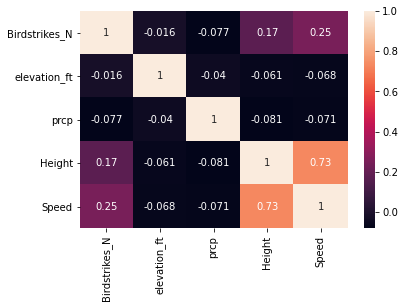

In [100]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

**PCA Analysis**